In [46]:
import numpy as np
# sklearn is just used to import a random dataset and to split the dataset into train and test
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# We can use breast cancer dataset
dataset = datasets.load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

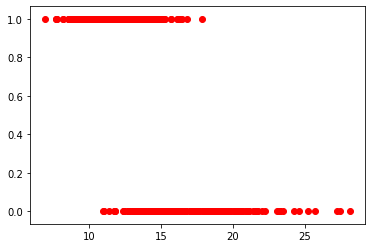

In [48]:
X, y = dataset.data, dataset.target
# Analyze the data
# print(X)
# print(X[:, 0])
plt.scatter(X[:, 0], y, c='r', marker='o')

In [49]:
# Size of X is m *n vector and y is 1d vector of size m(m is number of samples and n is number of features)
print(X.shape)
print(y.shape)
# Using a sklearn function to split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

(569, 30)
(569,)


## Gradient Descent update rules:
![Update Rules](images/update_rules.png)

In [74]:
# We will be using gradient descent here:

class LogisticRegression:
    def __init__(self, learning_rate=0.0001, n_iters=1000):
        self.learning_rate = learning_rate  # Learning rate should be less as we need to hit minimum
        self.n_iters = n_iters  # no. of iterations we want
        self.weights = None
        self.bias = None


    def sigmoid(self, z):
        # z = np.dot(X, weight) // commented coz we are already passing z value from fit or predict function(which also contains bias)
        return 1 / (1 + np.exp(-z))


    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        # Initialize required parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent method:
        for _ in range(self.n_iters):
            # First we calculate linear model values using y = mx+b
            linear_y = np.dot(X_train, self.weights) + self.bias
            # Now we have to apply sigmoid function
            y_pred = self.sigmoid(linear_y)
            # Now we need to update our weights and bias, we can use formula as shown above
            # This is same formula as mentioned in README file,, showing derivative of weight,
            # also we can ignore 2 as it is just a scaling entity
            dw = (1/n_samples) * np.dot(X_train.T, (y_pred-y_train))
            db = (1/n_samples) * np.sum(y_pred-y_train)
            self.weights -= self.learning_rate*dw 
            self.bias -= self.learning_rate*db 

    def predict(self, X_test):
        # We first here approx our data wrt linear model
        linear_y = np.dot(X_test, self.weights) + self.bias
        # Then we apply sigmoid function
        y_pred = self.sigmoid(linear_y)
        # Now we want to tell whether it is class 0 or class 1, 
        # so we say if it predicted value is larger than 0.5 then it is 1 else if it less then we take it as 0
        # Threshold here is considered as 0.5
        y_pred_out = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_out


    def get_accuracy(self, y_test, y_pred):
        # To get accuracy
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

In [77]:
# Create object for LogisticRegression class
logReg = LogisticRegression(learning_rate=0.0001, n_iters=1000)
# Train using training data
logReg.fit(X_train, y_train)
y_predicted = logReg.predict(X_test)

accuracy = logReg.get_accuracy(y_test, y_predicted)
print("Accuracy: ", accuracy)
# We are getting accracy of ~ 91.2%

Accuracy:  0.9122807017543859
